# Machine Learning

#### Importamos librerías relevantes

Primero importamos la notebook del EDA, para utilizar el dataframe que habíamos limpiado.

Hay un total de 6575 filas en el base de datos.
['direccion', 'm2', 'preciousd', 'preciopeso', 'usdm2', 'pesosm2', 'antig', 'galeria', 'dolar', 'trimestre_', 'barrios', 'comuna']
Barrios ordenados: ['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS ESTE', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES NORTE', 'FLORES SUR', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONTE CASTRO', 'MONTSERRAT', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO NORTE', 'VILLA DEVOTO SUR', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
Valores de galeria: ['SI' 'NO' nan 'S1']
Valores 

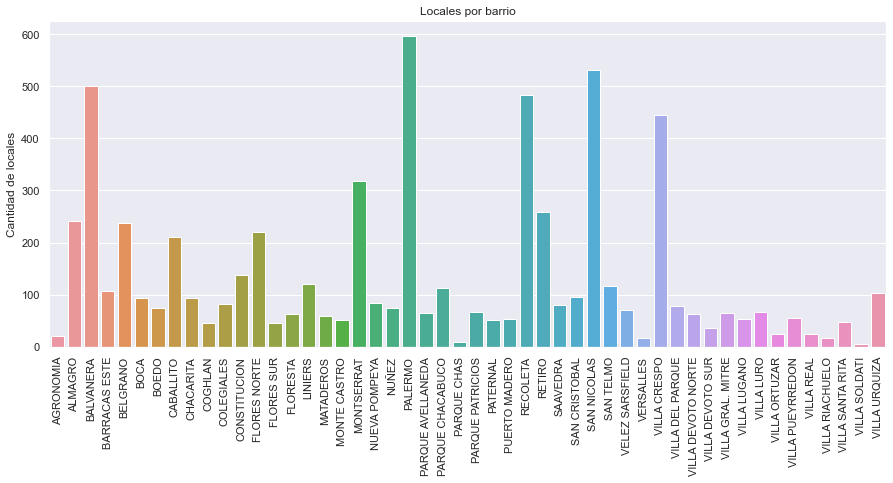

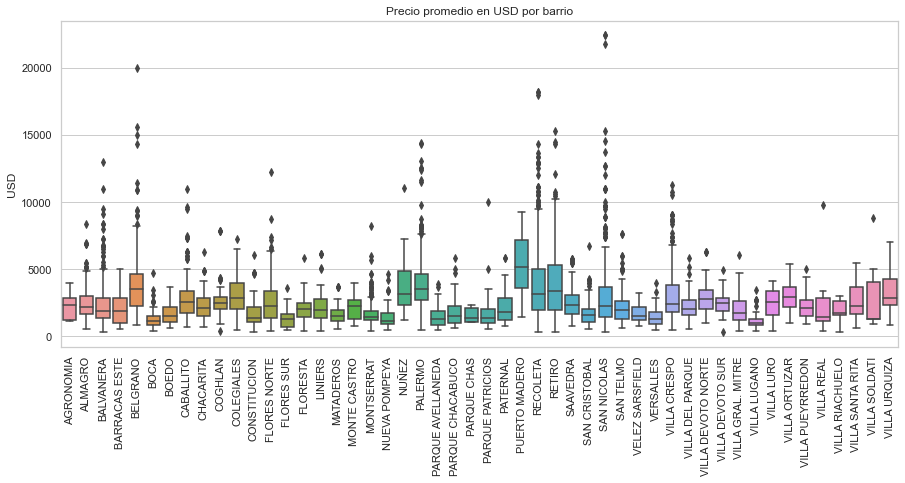

   comuna  preciousd
0       5      87000
1       5      92000
2       5     110000
3       5      60000
4       5     380000


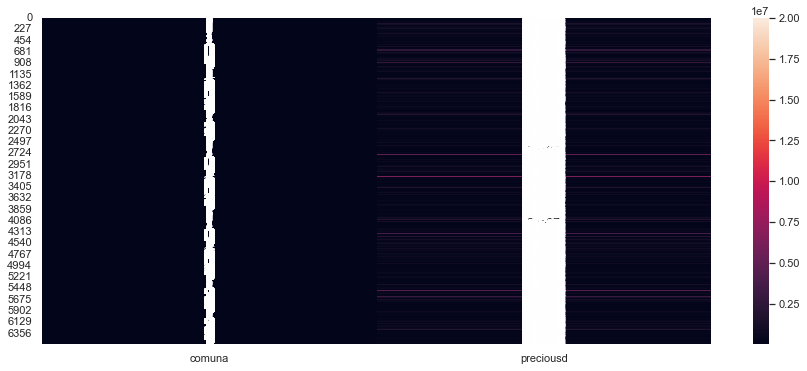

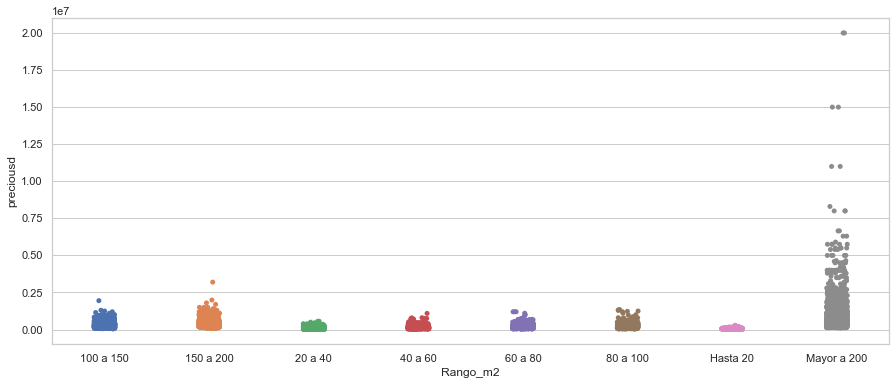

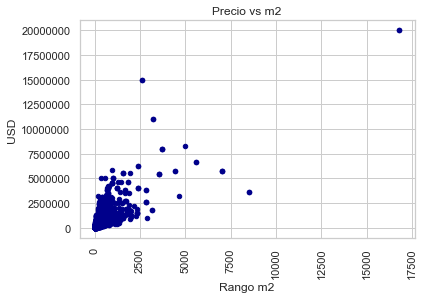

In [1]:
%run clusterai_Steven_Martins_eda.ipynb

Importamos librerías a utilizar:

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

En el EDA notamos que hay outliers que no representan una cantidad significativa de locales, en general hablando de montos superiores a los 3 millones de USD:

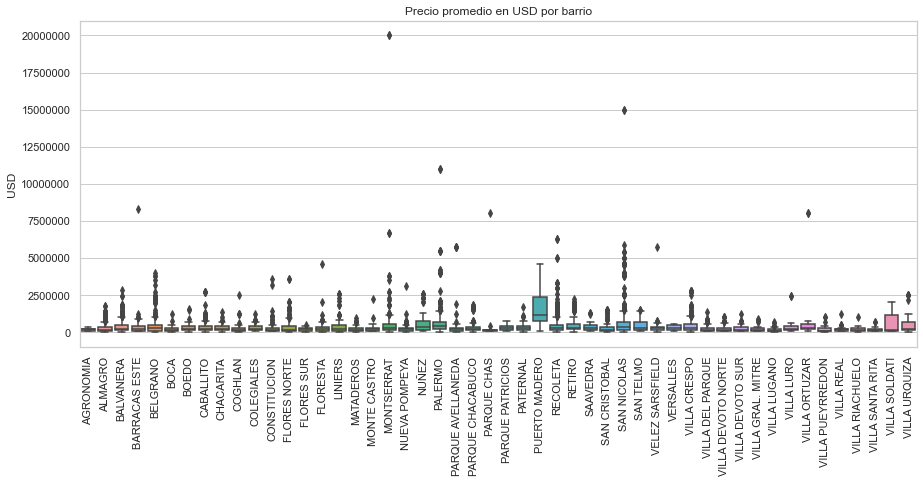

In [3]:
graf = df.sort_values("barrios")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=graf.barrios, y=graf.preciousd, data=graf)

plt.title("Precio promedio en USD por barrio")
plt.ylabel("USD")
plt.xlabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

Para solucionar esto, tomamos el percentil 99 del dataframe original y vemos gráficamente que llegamos a data mas representativa:

    m2  preciousd  usdm2  antig galeria  barrios  comuna     Rango_m2
0   26      87000   3346      5      SI  ALMAGRO       5      20 a 40
1   34      92000   2706     45      NO  ALMAGRO       5      20 a 40
2   60     110000   1833      0      NO  ALMAGRO       5      40 a 60
3   29      60000   2069     40      NO  ALMAGRO       5      20 a 40
4  334     380000   1138     65      NO  ALMAGRO       5  Mayor a 200


El percentil 99 limita los precios hasta el siguiente valor: 3500000.0


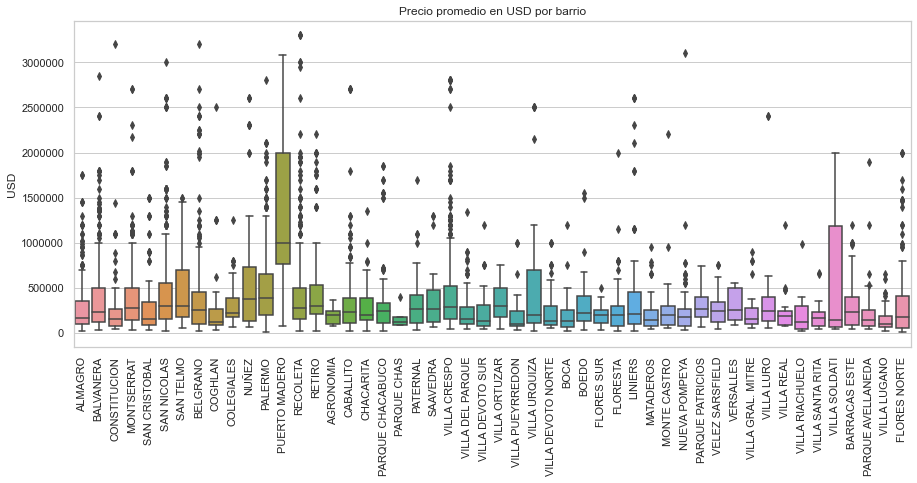

In [4]:
print(df.head())
print('\n')
print('El percentil 99 limita los precios hasta el siguiente valor: ' + str(df.preciousd.quantile(0.99)) )
df_ajustada = df[df.preciousd < df.preciousd.quantile(0.99)]

graf = df.sort_values("barrios")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_ajustada.barrios, y=df_ajustada.preciousd, data=graf)

plt.title("Precio promedio en USD por barrio")
plt.ylabel("USD")
plt.xlabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

#### Separamos el dataframe

In [5]:
y = np.array(df_ajustada.preciousd)
x = df_ajustada.drop(['preciousd', 'Rango_m2'], axis=1)
x.head()

,m2,usdm2,antig,galeria,barrios,comuna
0,26,3346,5,SI,ALMAGRO,5
1,34,2706,45,NO,ALMAGRO,5
2,60,1833,0,NO,ALMAGRO,5
3,29,2069,40,NO,ALMAGRO,5
4,334,1138,65,NO,ALMAGRO,5


In [6]:
x = pd.get_dummies(data=x)
x.shape

(6505, 56)

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

Centramos la data y la escalamos.

In [8]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(xtrain)

StandardScaler()

In [9]:
xtrain_sc = scaler.transform(X=xtrain)
xtest_sc = scaler.transform(X=xtest)

### Linear Regression

In [10]:
l_reg = LinearRegression()

In [11]:
l_reg.fit(xtrain_sc, ytrain)

LinearRegression()

In [12]:
ypred_lr = l_reg.predict(xtest_sc)
format(np.sqrt(mean_squared_error(ytest, ypred_lr)), '.4f')

'244039.1251'

### KNN Regressor

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

In [13]:
knn_reg = KNeighborsRegressor(weights="distance")
param_knn = {'n_neighbors': np.arange(1, 12, 1),
             'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#              'leaf_size': np.arange(1,11,5),
#              'p': [1,2]
            }
regressor_knn = GridSearchCV(estimator=knn_reg, param_grid=param_knn, n_jobs=-1, refit = True, cv=5, verbose=True)

Nota: Se probaron distintas variables en los párametros y los mostrados son los que devolvieron valores óptimos. Mostramos sólo estos para ahorrar tiempo de ejecución.

In [14]:
regressor_knn.fit(xtrain_sc, ytrain)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             verbose=True)

In [15]:
regressor_knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3}

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [16]:
ypred_knnr = regressor_knn.predict(xtest_sc)
format(np.sqrt(mean_squared_error(ytest, ypred_knnr)), '.4f')

'148604.4018'


### Support Vector Regressor

In [17]:
sv_reg = SVR()

In [18]:
param_svr = {'kernel': ['poly'],
             'C': np.arange(13, 17, 1),
             'gamma': ['scale', 'auto'],
             'coef0': np.arange(8, 12, 1),
             'shrinking': (True, False)
            }

In [19]:
regressor_svr = GridSearchCV(estimator=sv_reg, param_grid=param_svr, n_jobs=-1 ,refit = True, cv=5, verbose=True)

In [20]:
regressor_svr.fit(xtrain_sc, ytrain)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([13, 14, 15, 16]),
                         'coef0': array([ 8,  9, 10, 11]),
                         'gamma': ['scale', 'auto'], 'kernel': ['poly'],
                         'shrinking': (True, False)},
             verbose=True)

In [21]:
regressor_svr.best_params_

{'C': 16, 'coef0': 11, 'gamma': 'auto', 'kernel': 'poly', 'shrinking': False}

Nota: Se probaron distintas variables en los párametros y los mostrados son los que devolvieron valores óptimos. Mostramos sólo estos para ahorrar tiempo de ejecución.
El parámetro coef0 es la variable independiente de la función del kernel, y para el caso óptimo (poly) es relevante, por eso queda incluído.

In [22]:
ypred_svr = regressor_svr.predict(xtest_sc)
format(np.sqrt(mean_squared_error(ytest, ypred_svr)), '.4f')

'321987.8978'

### Random Forest Regressor

In [23]:
rf_reg = RandomForestRegressor()

In [24]:
param_rfr = {'n_estimators': np.arange(190, 250, 10), 
             'max_features': [0.3, 0.5, 0.7],  
             'min_samples_leaf': [1]}

In [25]:
regressor_rf = GridSearchCV(estimator=rf_reg, param_grid=param_rfr, refit = True, cv = 5, verbose=True)

In [26]:
regressor_rf.fit(xtrain, ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0.3, 0.5, 0.7],
                         'min_samples_leaf': [1],
                         'n_estimators': array([190, 200, 210, 220, 230, 240])},
             verbose=True)

In [27]:
regressor_rf.best_params_

{'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 190}

Nota: Se probaron distintas variables en los párametros y los mostrados son los que devolvieron valores óptimos. Mostramos sólo estos para ahorrar tiempo de ejecución.

In [28]:
ypred_rfr = regressor_rf.predict(xtest_sc)
format(np.sqrt(mean_squared_error(ytest, ypred_rfr)), '.4f')

'548382.3256'

### Graficamos comparativas entre los modelos entrenados

##### Diferencias entre valores reales y los estimados

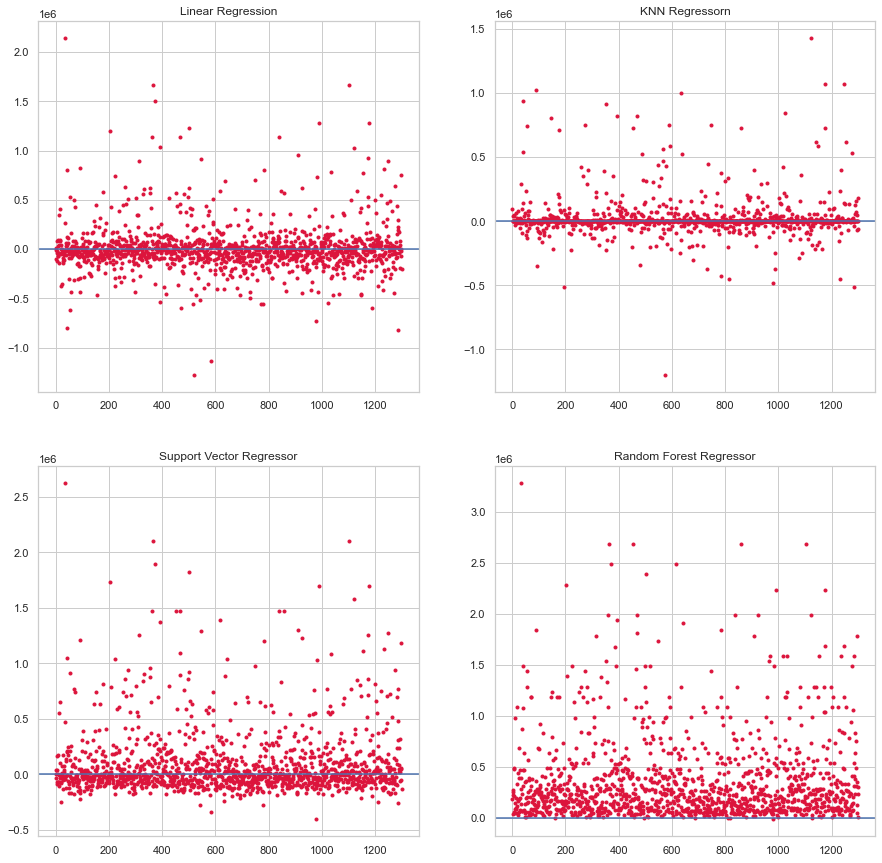

In [29]:
plt.subplots(figsize = (15,15))

plt.subplot(2, 2, 1)
plt.title('Linear Regression')
plt.plot(ytest - ypred_lr, marker='.',linestyle='', c='crimson')
plt.axhline(y=0, linestyle='-')

plt.subplot(2, 2, 2)
plt.title('KNN Regressorn')
plt.plot(ytest - ypred_knnr ,marker='.',linestyle='', c='crimson')
plt.axhline(y=0, linestyle='-')

plt.subplot(2, 2, 3)
plt.title('Support Vector Regressor')
plt.plot(ytest - ypred_svr ,marker='.',linestyle='', c='crimson')
plt.axhline(y=0, linestyle='-')    

plt.subplot(2, 2, 4)
plt.title('Random Forest Regressor')
plt.plot(ytest - ypred_rfr ,marker='.',linestyle='', c='crimson')
plt.axhline(y=0, linestyle='-')

Text(0.5, 0, 'Valores estimados')

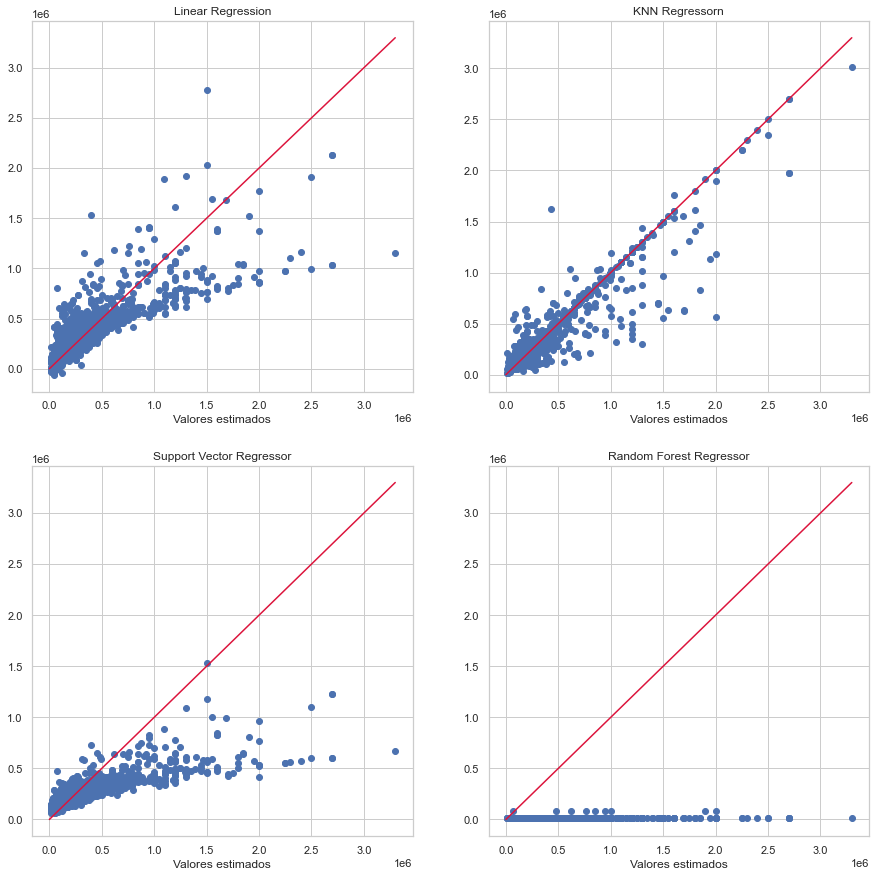

In [30]:
plt.subplots(figsize = (15,15))

plt.subplot(2, 2, 1)
plt.title('Linear Regression')
plt.scatter(ytest, ypred_lr)
plt.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'crimson')
plt.xlabel('Valores reales')
plt.xlabel('Valores estimados')

plt.subplot(2, 2, 2)
plt.title('KNN Regressorn')
plt.scatter(ytest, ypred_knnr)
plt.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'crimson')
plt.xlabel('Valores reales')
plt.xlabel('Valores estimados')
    
plt.subplot(2, 2, 3)
plt.title('Support Vector Regressor')
plt.scatter(ytest, ypred_svr)
plt.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'crimson')
plt.xlabel('Valores reales')
plt.xlabel('Valores estimados')
    
plt.subplot(2, 2, 4)
plt.title('Random Forest Regressor')
plt.scatter(ytest, ypred_rfr)
plt.plot(np.arange(np.max(ytest)),np.arange(np.max(ytest)), color = 'crimson')
plt.xlabel('Valores reales')
plt.xlabel('Valores estimados')